In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [43]:
mean = np.array([20, 20])
cov = np.array([[5, 1], [1, 5]])
x, y = np.random.multivariate_normal(mean, cov, 1000).T

Text(0, 0.5, 'feature 2')

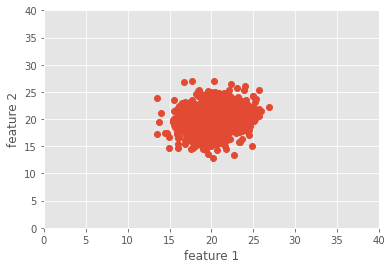

In [44]:
plt.style.use('ggplot')
plt.plot(x, y, 'o', zorder = 1)
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

OpenCVでのPCAは、特徴ベクトルx、およびyを結合し、単一の特徴行列にする必要がある。

In [53]:
X = np.vstack((x, y)).T

In [46]:
import cv2
mu, eig = cv2.PCACompute(X, np.array([]))
eig

array([[ 0.65477177,  0.75582666],
       [ 0.75582666, -0.65477177]])

Text(0, 0.5, 'feature 2')

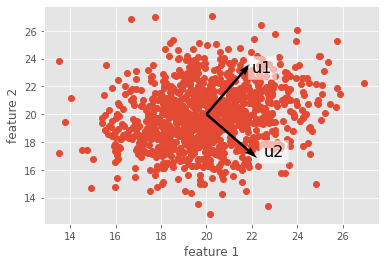

In [93]:
plt.plot(x, y, 'o', zorder = 1)
plt.quiver(mean[0], mean[1], eig[0, 0], eig[1, 0], scale = 5)
plt.quiver(mean[0], mean[1], eig[0, 1], eig[1, 1], scale = 5)
plt.text(mean[0] + 2, mean[1] + 3, 'u1', fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0] + 2.5, mean[1] - 3, 'u2', fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.xlabel('feature 1')
plt.ylabel('feature 2')

回転させる。

In [94]:
X2 = cv2.PCAProject(X, mu, eig)

(-20.0, 20.0, -10.0, 10.0)

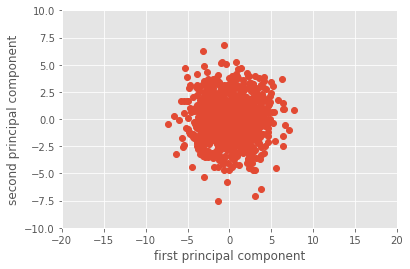

In [96]:
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.axis([-20, 20, -10, 10])

#### 独立成分分析を実装する

分解の成分を互いにできるだけ独立させるようにする。

In [100]:
from sklearn import decomposition
ica = decomposition.FastICA()
X2 = ica.fit_transform(X)

(-0.2, 0.2, -0.2, 0.2)

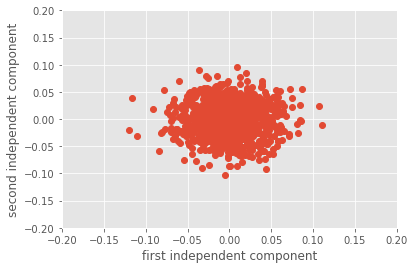

In [104]:
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first independent component')
plt.ylabel('second independent component')
plt.axis([-0.2, 0.2, -0.2, 0.2])

#### 非負値行列因子分解を実装する

非負のデータのみに動作する。

In [106]:
nmf = decomposition.NMF()
X2 = nmf.fit_transform(X)

/Users/tsutsumimasanori/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/Users/tsutsumimasanori/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'second non-negative component')

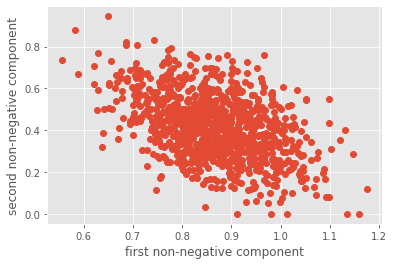

In [108]:
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first non-negative component')
plt.ylabel('second non-negative component')

#### カテゴリ変数を表現する

In [109]:
data = [
    {'name': 'Alan Turing', 'born': 1912, 'died': 1954}, 
    {'name': 'Herbert A. Simon', 'born': 1916, 'died': 2001}, 
    {'name': 'Jacek Karpinski', 'born': 1927, 'died': 2010}, 
    {'name': 'J.C.R. Licklider', 'born': 1915, 'died': 1990}, 
    {'name': 'Marvin Minsky', 'born': 1927, 'died': 2016},
]

In [110]:
{'Alan Turing': 1,
 'Herbert A. Simon': 2,
 'Jacek Karpinsky': 3,
 'J.C.R. Licklider': 4,
 'Marvin Minsky': 5};

In [112]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[1912, 1954,    1,    0,    0,    0,    0],
       [1916, 2001,    0,    1,    0,    0,    0],
       [1927, 2010,    0,    0,    0,    1,    0],
       [1915, 1990,    0,    0,    1,    0,    0],
       [1927, 2016,    0,    0,    0,    0,    1]])

In [114]:
vec.get_feature_names()

/Users/tsutsumimasanori/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['born',
 'died',
 'name=Alan Turing',
 'name=Herbert A. Simon',
 'name=J.C.R. Licklider',
 'name=Jacek Karpinski',
 'name=Marvin Minsky']

In [115]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<5x7 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>